<a href="https://colab.research.google.com/github/Jaxy205/TriTueNhanTao/blob/main/2001230349_TTNT_Tuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Họ và tên: Lưu Trí Kiệt
### MSSV: 2001230349

### Đặt vấn đề

Trong lĩnh vực trí tuệ nhân tạo và tối ưu hóa, việc tìm kiếm lời giải khả thi cho các hệ thống phức tạp luôn đóng vai trò quan trọng. Những bài toán mà lời giải phải đồng thời thỏa mãn một tập các điều kiện tiên quyết được xếp vào nhóm **Bài toán thỏa mãn ràng buộc (Constraint Satisfaction Problems – CSP)**. Đây là một lớp bài toán phổ biến với nhiều ứng dụng thực tế, ví dụ như tối ưu hóa lịch biểu, lập kế hoạch, hoặc thiết kế mạng truyền thông.

Một ví dụ tiêu biểu của CSP là **Bài toán tô màu đồ thị (Graph Coloring)**. Nhiệm vụ của bài toán là gán màu cho các đỉnh của đồ thị sao cho không tồn tại hai đỉnh kề nhau cùng màu. Mặc dù có định nghĩa tương đối đơn giản, bài toán xác định số màu nhỏ nhất cần dùng (sắc số) lại thuộc lớp NP-Hard. Vì vậy, các phương pháp vét cạn truyền thống thường không khả thi đối với đồ thị có kích thước lớn, từ đó đặt ra yêu cầu cần những cách tiếp cận hiệu quả hơn về mặt tính toán.




### Lý thuyết về Bài toán Thỏa mãn ràng buộc (CSP)

**Định nghĩa:**  
Một bài toán thỏa mãn ràng buộc (Constraint Satisfaction Problem – CSP) được mô hình bởi bộ ba $(X, D, C)$:

- $X = \{X_1, X_2, \dots, X_n\}$: tập biến cần xác định giá trị.
- $D = \{D_1, D_2, \dots, D_n\}$: miền giá trị tương ứng của từng biến.
- $C$: tập các ràng buộc giới hạn các tổ hợp giá trị hợp lệ.

**Ràng buộc có thể thể hiện bởi:**
- Biểu thức toán học hoặc logic (ví dụ: $X_i \neq X_j$).
- Hoặc bảng liệt kê các cấu hình hợp lệ.

**Lời giải:**  
Một lời giải là phép gán giá trị cho tất cả các biến sao cho không vi phạm ràng buộc nào. Nhiều bài toán tối ưu và lập lịch trong thực tế có thể quy về dạng CSP.

### Bài toán Tô màu đồ thị (Graph Coloring)

**Phát biểu bài toán:**  
Cho đồ thị vô hướng $G = (V, E)$. Mỗi đỉnh $v \in V$ tương ứng một biến màu, miền giá trị là tập màu $K = \{1, 2, ..., m\}$.

**Ràng buộc:**  
Hai đỉnh kề nhau không được tô cùng màu:
$$\forall (u, v) \in E \Rightarrow Color(u) \neq Color(v)$$

**Mục tiêu tối ưu:**  
Tìm số màu nhỏ nhất $m$ sao cho tồn tại phép gán màu hợp lệ. Giá trị này được gọi là Sắc số (Chromatic Number), ký hiệu $\chi(G)$.

### Nguyên lý hoạt động  

Thuật toán dựa trên quan sát rằng: một đỉnh có bậc càng lớn thì càng bị ràng buộc bởi nhiều láng giềng, do đó sẽ khó tô màu hơn. Vì vậy, các đỉnh có bậc cao cần được xử lý trước. Sau khi một đỉnh được tô màu, ta có thể xem đỉnh đó đã được “giải quyết”, đồng thời giảm bậc của các đỉnh kề nhằm phản ánh rằng chúng đã mất đi một láng giềng chưa tô màu.

---

### Các bước của thuật toán  

Thuật toán lặp lại cho đến khi tất cả các đỉnh được tô màu.

#### **Bước 1: Lựa chọn đỉnh (Selection)**
- Trong số các đỉnh chưa tô, chọn đỉnh \(v\) có bậc hiện tại lớn nhất.  
- Nếu có nhiều đỉnh cùng bậc, có thể chọn đỉnh có chỉ số nhỏ hơn hoặc lựa chọn ngẫu nhiên.
- Gán cho \(v\) màu \(i\) nhỏ nhất có thể sao cho màu này không trùng với các đỉnh kề đã được tô (không thuộc tập màu bị cấm).

---

#### **Bước 2: Hạ bậc (Degree Reduction)**
- Đánh dấu \(v\) là đã tô (bậc bằng 0 hoặc loại khỏi danh sách xét).
- Với mọi đỉnh \(u\) kề \(v\) và chưa tô màu: cập nhật
  \[
  Degree[u] := Degree[u] - 1
  \]
- Ý nghĩa: các đỉnh kề bị giảm độ ưu tiên vì số láng giềng chưa giải quyết của chúng đã giảm.

---

#### **Bước 3: Lan truyền ràng buộc (Constraint Propagation)**
- Đánh dấu màu \(i\) (vừa gán cho đỉnh \(v\)) là màu “cấm” đối với từng đỉnh \(u\) kề \(v\).
- Khi đến lượt tô màu \(u\), thuật toán sẽ loại bỏ các màu đã bị cấm khỏi danh sách lựa chọn.


import các thư viện

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

Đưa file lên colab

In [ ]:
from google.colab import files

# 1. Chạy dòng này, một nút "Choose Files" sẽ hiện ra
uploaded = files.upload()

Đọc file

In [ ]:
G = []
with open('matrix.txt', 'r') as f:
    for line in f:
        if not line.strip():
            continue

        row = list(map(int, line.strip().split(',')))
        G.append(row)

print("Ma trận G:")
G

Khởi tạo đồ thị

In [6]:
G = [[ 0, 1, 1, 0, 1, 0],
     [ 1, 0, 1, 1, 0, 1],
     [ 1, 1, 0, 1, 1, 0],
     [ 0, 1, 1, 0, 0, 1],
     [ 1, 0, 1, 0, 0, 1],
     [ 0, 1, 0, 1, 1, 0]]

In [7]:
node = 'ABCDEF'
t = {}
for i in range(len(G)):
  t[node[i]] = i
t

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}

Đếm bậc của các đỉnh

In [8]:
degree =[]
for i in range(len(G)):
  degree.append(sum(G[i]))
degree

[3, 4, 4, 3, 3, 3]

Những màu có thể sử dụng để tô màu các đỉnh

In [9]:
colorDict = {}
for i in range(len(G)):
  colorDict[node[i]]=['Blue', 'Red', 'Yellow', 'Greeen']
colorDict

{'A': ['Blue', 'Red', 'Yellow', 'Greeen'],
 'B': ['Blue', 'Red', 'Yellow', 'Greeen'],
 'C': ['Blue', 'Red', 'Yellow', 'Greeen'],
 'D': ['Blue', 'Red', 'Yellow', 'Greeen'],
 'E': ['Blue', 'Red', 'Yellow', 'Greeen'],
 'F': ['Blue', 'Red', 'Yellow', 'Greeen']}

Dùng selection sort đề sắp xếp các đỉnh theo bậc từ cao đến thấp

In [10]:
# Sắp xếp các đỉnh theo thứ tự bậc
sortedNode=[]
indeks = []
# use selection sort
for i in range(len(degree)):
  max = 0
  j = 0
  for j in range(len(degree)):
    if j not in indeks:
      if degree[j] > max:
        max = degree[j]
        idx = j
  indeks.append(idx)
  sortedNode.append(node[idx])

sortedNode

['B', 'C', 'A', 'D', 'E', 'F']

Thực hiện thuật toán tô màu đồ thị

In [11]:
theSolution={}
edges = []

for n in sortedNode:
  setTheColor = colorDict[n]
  theSolution[n] = setTheColor[0]
  adjacentNode = G[t[n]]
  for j in range(len(adjacentNode)):
    if adjacentNode[j]==1:
      edges.append((n, node[j]))
      if (setTheColor[0] in colorDict[node[j]]):
        colorDict[node[j]].remove(setTheColor[0])
theSolution

{'B': 'Blue',
 'C': 'Red',
 'A': 'Yellow',
 'D': 'Yellow',
 'E': 'Blue',
 'F': 'Red'}

Vẽ đồ thị

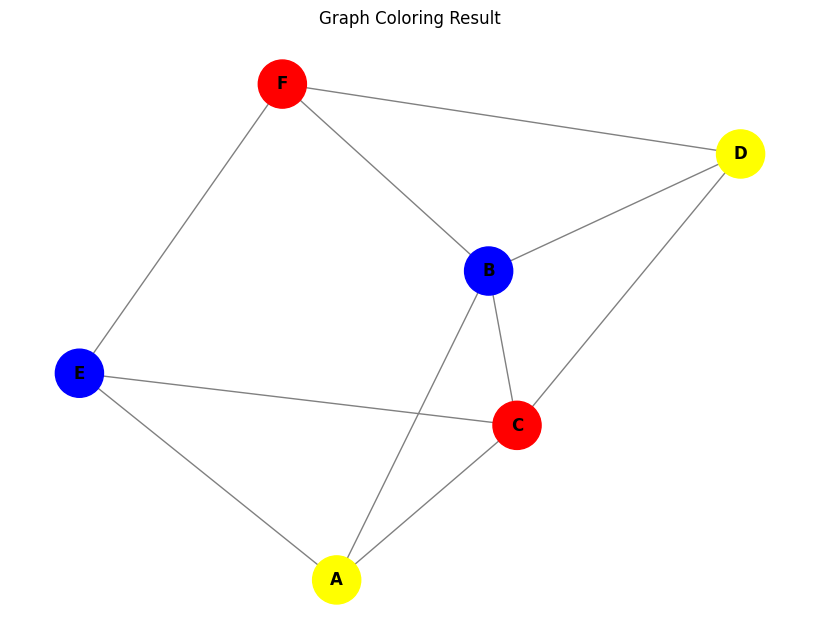

In [12]:
G = nx.Graph()
G.add_edges_from(edges)
values = [theSolution.get(node, 'lightgray') for node in G.nodes()]
plt.figure(figsize=(8, 6))

nx.draw(
    G,
    node_color=values,
    with_labels=True,
    node_size=1200,
    font_color='black',
    font_weight='bold',
    edge_color='gray'
)

plt.title("Graph Coloring Result")
plt.show()